In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("."))

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
%matplotlib inline

# Any results you write to the current directory are saved as output.

['Extra_Package', '.DS_Store', 'housing.py', 'housing1.ipynb', 'test.csv', 'housing2.ipynb', 'data_description.txt', 'train.csv', '.ipynb_checkpoints', 'kernelf2d782ba70.ipynb', 'check_cate.py', 'sample_submission.csv']


In [2]:
PATH = "."


In [3]:
train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')

train_df = train_df.drop("Id",axis=1)
test_df = test_df.drop("Id",axis=1)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non

In [6]:
#all_is_nan = train_df.isna().sum()
def get_nanbycol (data):
    all_nan = data.isnull().sum(axis = 0)
    nan_df = pd.DataFrame(all_nan,columns=['nans'])
    abovezero = nan_df[nan_df['nans']>0]
    return abovezero

In [7]:
get_nanbycol(train_df)

,nans
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [8]:
get_nanbycol(test_df)

,nans
MSZoning,4
LotFrontage,227
Alley,1352
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,16
MasVnrArea,15
BsmtQual,44
BsmtCond,45


In [9]:
test_df['SalePrice']= -999
all_sample = pd.concat([train_df,test_df])

In [10]:
all_sample.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,89992.259335
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,106921.136795
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,-999.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,-999.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,34900.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,163000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [11]:
all_sample.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
missing_data = get_nanbycol(all_sample)
missing_data

,nans
MSZoning,4
LotFrontage,486
Alley,2721
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,24
MasVnrArea,23
BsmtQual,81
BsmtCond,82


In [13]:
mising_ntr_by_col = list(missing_data.index)
mising_ntr_by_col

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [16]:
all_sample['BsmtExposure'].value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

In [467]:
#all_sample['Alley'].value_counts()

In [468]:


#all_bas =  all_sample[all_sample['BsmtQual'].isnull() &
#                      all_sample['BsmtCond'].isnull() &
#                      all_sample['BsmtExposure'].isnull() &
#                      all_sample['BsmtFinType1'].isnull() &
#                      all_sample['BsmtFinType2'].isnull() 
                     ] 

#all_basF = all_bas[['BsmtFinType1','BsmtFinType2','TotalBsmtSF','BsmtExposure']] 
#all_basF

In [469]:
#all_sam = all_sample[all_sample['GarageFinish'].isnull()]
#Garage_var = all_sam[['GarageCond','GarageQual','GarageArea','GarageCars','GarageFinish','GarageType']]


In [470]:
#all_sample['GarageCars'].mode()

0    2.0
dtype: float64

In [471]:
#return a dic with feature and column index

#def get_feature_index(data,missing_col):
#    feature_ix = {}
#    data_colums = data.columns
#    for col_miss in missing_col:
#        col_ix = list(data.columns).index(col_miss)
#        feature_ix[col_miss] = col_ix
#    return feature_ix
    
    
#dic_mising_feature_ix = get_feature_index(all_sample,mising_ntr_by_col)

In [472]:
dic_mising_feature_ix

{'Alley': 5,
 'BsmtCond': 30,
 'BsmtExposure': 31,
 'BsmtFinSF1': 33,
 'BsmtFinSF2': 35,
 'BsmtFinType1': 32,
 'BsmtFinType2': 34,
 'BsmtFullBath': 46,
 'BsmtHalfBath': 47,
 'BsmtQual': 29,
 'BsmtUnfSF': 36,
 'Electrical': 41,
 'Exterior1st': 22,
 'Exterior2nd': 23,
 'Fence': 72,
 'FireplaceQu': 56,
 'Functional': 54,
 'GarageArea': 61,
 'GarageCars': 60,
 'GarageCond': 63,
 'GarageFinish': 59,
 'GarageQual': 62,
 'GarageType': 57,
 'GarageYrBlt': 58,
 'KitchenQual': 52,
 'LotFrontage': 2,
 'MSZoning': 1,
 'MasVnrArea': 25,
 'MasVnrType': 24,
 'MiscFeature': 73,
 'PoolQC': 71,
 'SaleType': 77,
 'TotalBsmtSF': 37,
 'Utilities': 8}

In [473]:
all_sample.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [474]:

decision_dic = {'MSZoning':'Replacewith_RL',
 'LotFrontage':'MODE',
 'Alley':'Replacewith_NA',
 'Utilities':'Replacewith_AllPub',
 'Exterior1st':'Replacewith_VinylSd',
 'Exterior2nd':'Replacewith_VinylSd',
 'MasVnrType':'Replacewith_None',
 'MasVnrArea':'MODE',
 'BsmtQual':'Replacewith_NA',
 'BsmtCond':'Replacewith_NA',
 'BsmtExposure':'Replacewith_NA',
 'BsmtFinType1':'Replacewith_NA',
 'BsmtFinSF1':'MODE',
 'BsmtFinType2':'Replacewith_NA',
 'BsmtFinSF2':'MODE',
 'BsmtUnfSF':'MODE',
 'TotalBsmtSF':'MODE',
 'BsmtFullBath':'MODE',
 'BsmtHalfBath':'MODE',
 'KitchenQual':'Replacewith_TA',
 'Functional':'Replacewith_Typ',
 'FireplaceQu':'Replacewith_NA',
 'GarageType':'Replacewith_NA',
 'GarageYrBlt':'ROWReplace_YearBuilt',
 'GarageFinish':'Replacewith_NA',
 'GarageCars':'MODE',
 'GarageArea':'MODE',
 'GarageQual':'Replacewith_TA',
 'GarageCond':'Replacewith_TA',
 'PoolQC':'Replacewith_NA',
 'Fence':'Replacewith_NA',
 'MiscFeature':'Replacewith_NA',
 'SaleType':'Replacewith_WD'}


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

def clean_all_nan(X,decision_dic):
    
    for col in decision_dic:
        decision = decision_dic[col]
        
        # fill all nan with mode
        if decision == "MODE":
            print('filling {} with MODE'.format(col))
            X[col].fillna(X[col].mode()[0],inplace=True)
        if "Replacewith" in decision:
            _,var = decision.split("_")
            var = str(var)
            print('Repalcing  {} with {}'.format(col,var))
            X[col].fillna(var,inplace=True)
            #X[col] = pd.Categorical(X[col])
            
        if "ROWReplace" in decision:
            _,var = decision.split("_")
            print('filling {} with value from {}'.format(col,var))
            X[col].fillna(value=X[var])
            
    return X
    
            
        
Clean_data_all = clean_all_nan(all_sample,decision_dic)


Repalcing  MSZoning with RL
filling LotFrontage with MODE
Repalcing  Alley with NA
Repalcing  Utilities with AllPub
Repalcing  Exterior1st with VinylSd
Repalcing  Exterior2nd with VinylSd
Repalcing  MasVnrType with None
filling MasVnrArea with MODE
Repalcing  BsmtQual with NA
Repalcing  BsmtCond with NA
Repalcing  BsmtExposure with NA
Repalcing  BsmtFinType1 with NA
filling BsmtFinSF1 with MODE
Repalcing  BsmtFinType2 with NA
filling BsmtFinSF2 with MODE
filling BsmtUnfSF with MODE
filling TotalBsmtSF with MODE
filling BsmtFullBath with MODE
filling BsmtHalfBath with MODE
Repalcing  KitchenQual with TA
Repalcing  Functional with Typ
Repalcing  FireplaceQu with NA
Repalcing  GarageType with NA
filling GarageYrBlt with value from YearBuilt
Repalcing  GarageFinish with NA
filling GarageCars with MODE
filling GarageArea with MODE
Repalcing  GarageQual with TA
Repalcing  GarageCond with TA
Repalcing  PoolQC with NA
Repalcing  Fence with NA
Repalcing  MiscFeature with NA
Repalcing  SaleType 

In [475]:
Clean_data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 no

In [476]:
Clean_data_all.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,67.756423,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.272011,49.565262,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,89992.259335
std,42.517628,21.592540,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.606014,169.179104,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,106921.136795
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,-999.000000
25%,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,-999.000000
50%,50.000000,63.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,34900.000000
75%,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,163000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [477]:
Clean_data_all['MSSubClass'] = pd.Categorical(Clean_data_all.MSSubClass)

In [499]:
df_num_col = Clean_data_all._get_numeric_data().columns
cat_col = list(set(Clean_data_all.columns) - set(df_num_col))
category_set = Clean_data_all[cat_col]
category_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 44 columns):
MSSubClass       2919 non-null category
Utilities        2919 non-null object
GarageFinish     2919 non-null object
MSZoning         2919 non-null object
SaleType         2919 non-null object
Electrical       2918 non-null object
Functional       2919 non-null object
Condition1       2919 non-null object
MasVnrType       2919 non-null object
CentralAir       2919 non-null object
RoofStyle        2919 non-null object
GarageType       2919 non-null object
MiscFeature      2919 non-null object
Exterior2nd      2919 non-null object
Heating          2919 non-null object
BsmtFinType2     2919 non-null object
RoofMatl         2919 non-null object
PavedDrive       2919 non-null object
Alley            2919 non-null object
Street           2919 non-null object
Neighborhood     2919 non-null object
BldgType         2919 non-null object
Condition2       2919 non-null object
ExterQual        

In [504]:
#from sklearn.preprocessing import OneHotEncoder
#cat_encoder = OneHotEncoder()
#category_set_1hot = cat_encoder.fit(category_set)

#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#category_set = category_set.apply(lambda col: le.fit_transform(col))


#ordinal_encoder = OrdinalEncoder()
#housing_cat_encoded = ordinal_encoder.fit_transform(category_set)
#housing_cat_encoded[:10]


In [505]:
Clean_data_all = pd.get_dummies(Clean_data_all)

In [481]:
Clean_data_all.info()

In [482]:
clean_train_data_temp = Clean_data_all[Clean_data_all['SalePrice'] != -999]

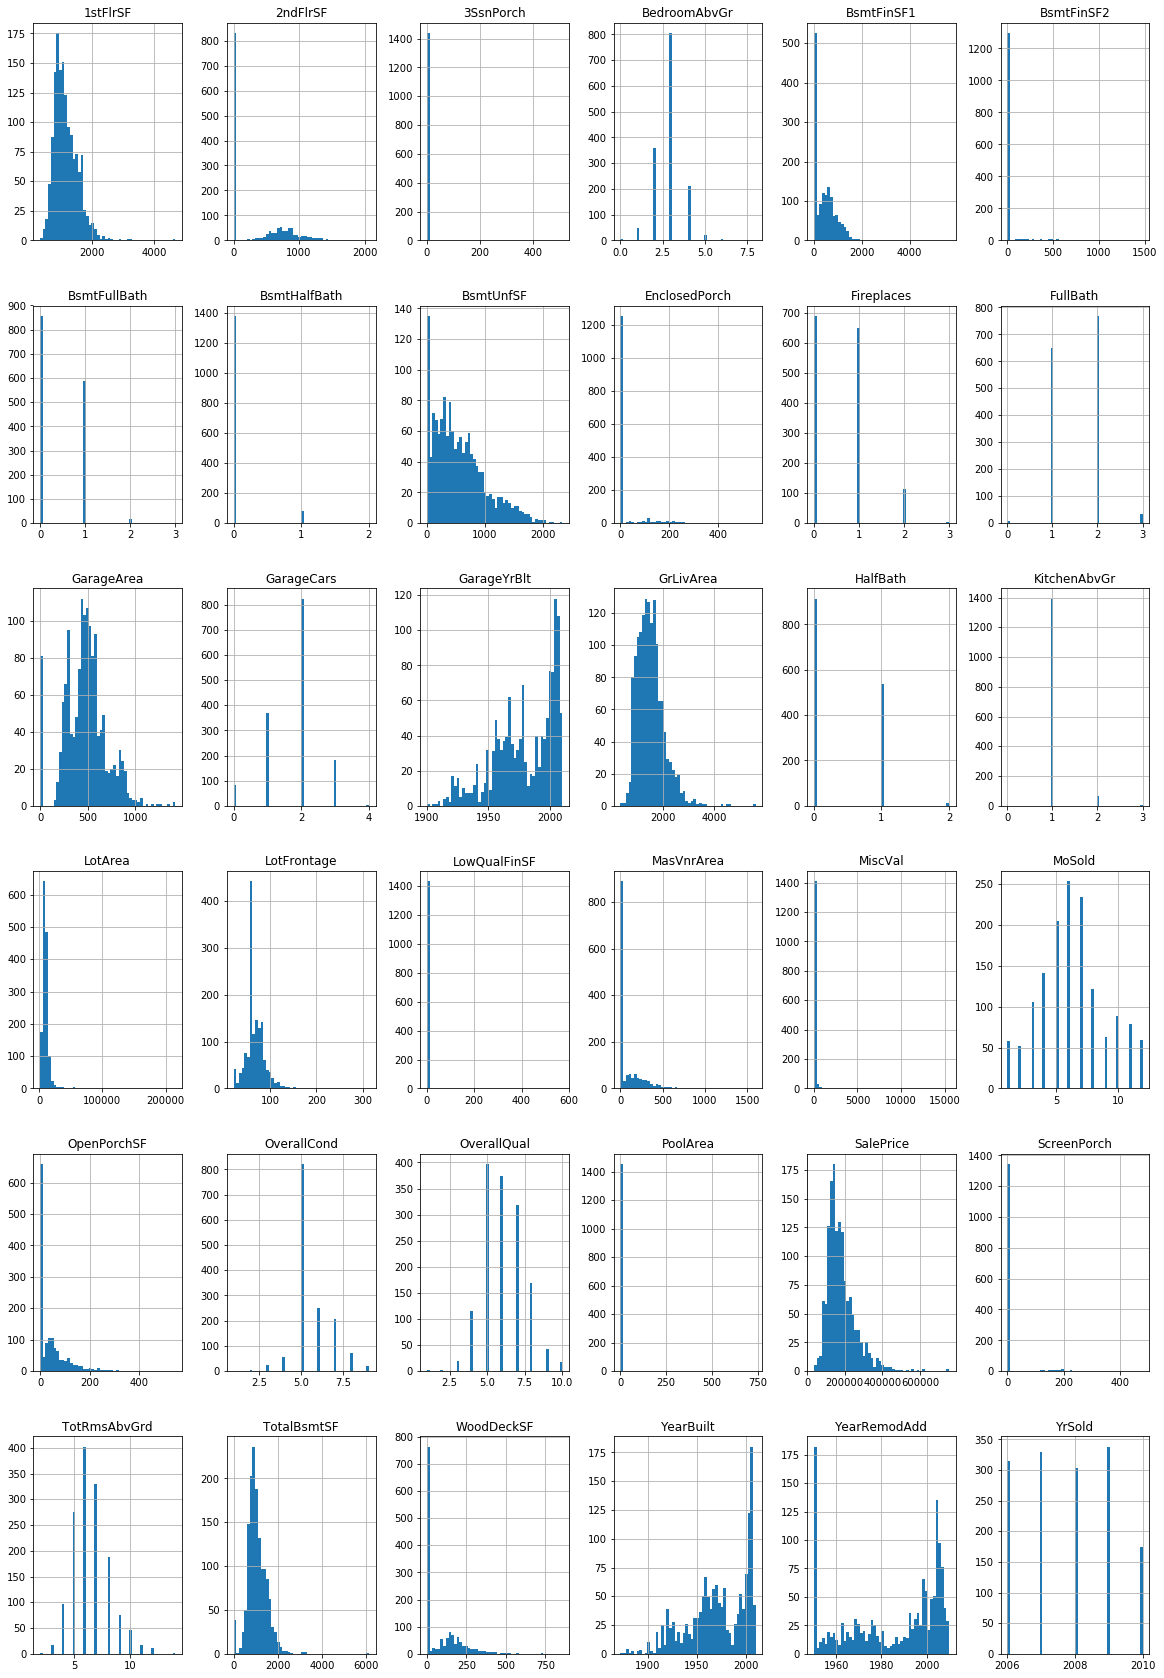

In [483]:

clean_train_data_temp.hist(bins=50, figsize=(20,30))
plt.show()

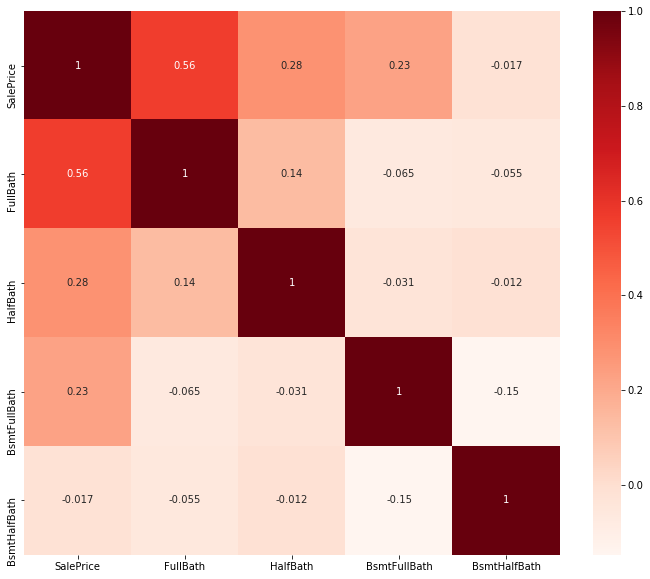

In [484]:
clean_train_data_temp[["FullBath","HalfBath","BsmtFullBath","BsmtHalfBath"]].describe()
plt.figure(figsize=(12,10))
corr_matrix_bath = clean_train_data_temp[["SalePrice","FullBath","HalfBath","BsmtFullBath","BsmtHalfBath"]].corr()
sns.heatmap(corr_matrix_bath,annot=True,cmap=plt.cm.Reds)

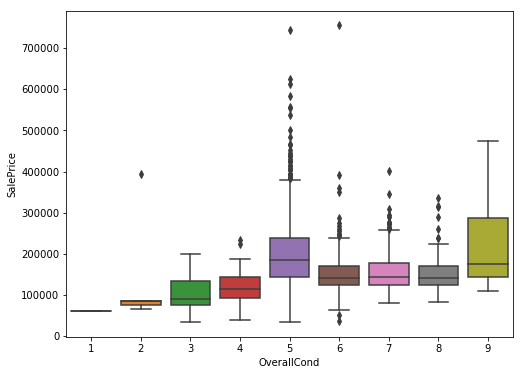

In [485]:
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x="OverallCond",y="SalePrice",data =clean_train_data_temp)

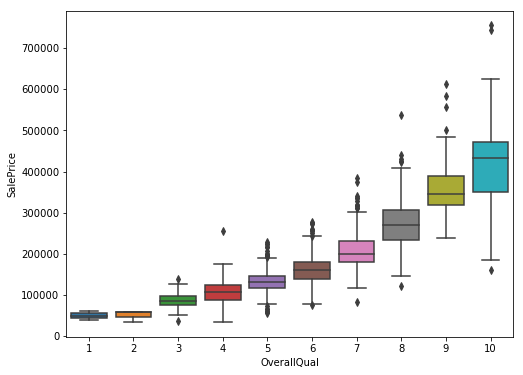

In [486]:
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x="OverallQual",y="SalePrice",data =clean_train_data_temp)

/Users/kehindetomiwa/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


1.8828757597682129

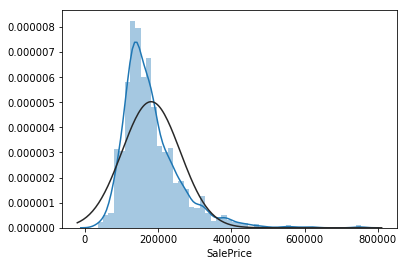

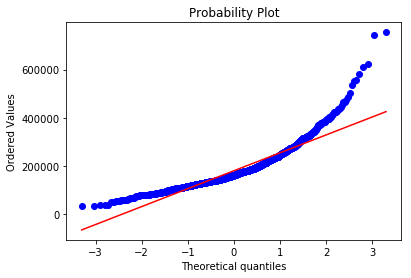

In [487]:

sns.distplot(clean_train_data_temp['SalePrice'],fit=norm);
fig =plt.figure()
res = stats.probplot(clean_train_data_temp['SalePrice'],plot=plt)

clean_train_data_temp['SalePrice'].skew(axis=0)

In [488]:
clean_train_data_temp['SalePrice'] = np.log(clean_train_data_temp['SalePrice'])

/Users/kehindetomiwa/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


/Users/kehindetomiwa/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0.12133506220520406

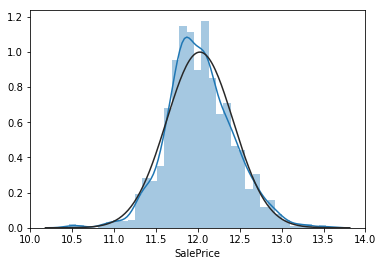

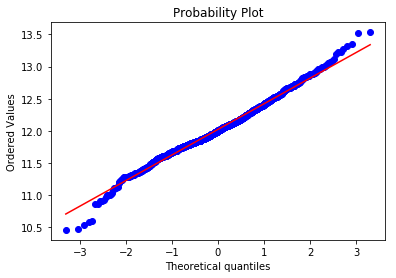

In [489]:
sns.distplot(clean_train_data_temp['SalePrice'],fit=norm);
fig =plt.figure()
res = stats.probplot(clean_train_data_temp['SalePrice'],plot=plt)

clean_train_data_temp['SalePrice'].skew(axis=0)

/Users/kehindetomiwa/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


1.3665603560164552

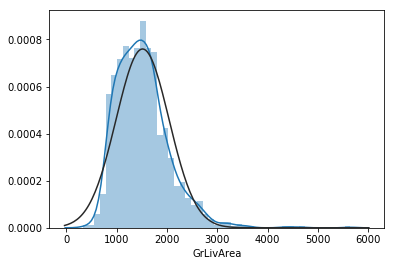

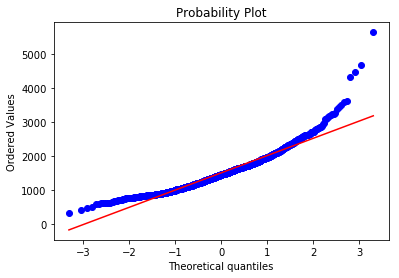

In [490]:
sns.distplot(clean_train_data_temp['GrLivArea'],fit=norm);
fig =plt.figure()
res = stats.probplot(clean_train_data_temp['GrLivArea'],plot=plt)

clean_train_data_temp['GrLivArea'].skew(axis=0)

/Users/kehindetomiwa/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/kehindetomiwa/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


-0.006995182187690808

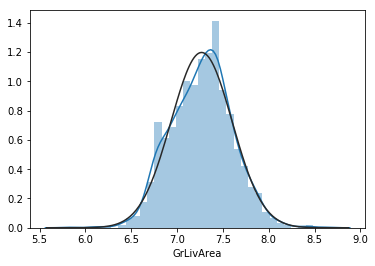

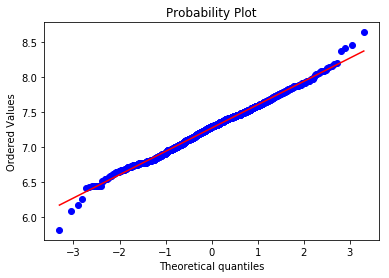

In [491]:
clean_train_data_temp['GrLivArea'] = np.log(clean_train_data_temp['GrLivArea'])
sns.distplot(clean_train_data_temp['GrLivArea'],fit=norm);
fig =plt.figure()
res = stats.probplot(clean_train_data_temp['GrLivArea'],plot=plt)

clean_train_data_temp['GrLivArea'].skew(axis=0)

In [492]:
clean_test_data = Clean_data_all[Clean_data_all['SalePrice'] == -999]
clean_test_data = Clean_data_all.drop('SalePrice',axis=1)

clean_test_data.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,67.756423,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.272011,49.565262,560.579993,...,472.712573,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,21.592540,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.606014,169.179104,439.590889,...,215.535686,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,63.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,805.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [493]:
clean_train_data = Clean_data_all[Clean_data_all['SalePrice'] != -999]
#clean_test_data = clean_test_data.drop('SalePrice',axis=1)

clean_train_data.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,68.267123,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,22.356355,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [494]:
feature_dic = {'Bath':'Yes',
               'Age':'Yes',
               'Log':'GrLivArea',
               'Log':'SalePrice'
    
    
}

In [495]:
def feature_engineering(X,feature_dic):
    for ftype in feature_dic:
        decision = feature_dic[ftype]
        if ftype == 'Bath'and decision =='Yes':
            print('creating Bath feature')
            X['TotalBaths'] = X.FullBath + X.HalfBath*0.5 + X.BsmtFullBath + X.BsmtHalfBath*0.5  
            X = X.drop(['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath'],axis=1) 
        if ftype == 'Age'and decision =='Yes':
            print('creating Age feature')
            X['Age']=X.YrSold - X.YearRemodAdd
            X = X.drop(['YrSold','YearRemodAdd'],axis=1)
        
        if ftype == 'Log':
            X[decision] = np.log(X[decision])
    return X

In [496]:
train_feature_eng = feature_engineering(clean_train_data,feature_dic)
train_feature_eng.describe()

creating Bath feature
creating Age feature


/Users/kehindetomiwa/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,TotalBaths,Age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,68.267123,10516.828082,6.099315,5.575342,1971.267808,103.117123,443.639726,46.549315,567.240411,1057.429452,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,12.024051,2.210616,22.950000
std,22.356355,9981.264932,1.382997,1.112799,30.202904,180.731373,456.098091,161.319273,441.866955,438.705324,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,0.399452,0.785399,20.640653
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.460242,1.000000,-1.000000
25%,60.000000,7553.500000,5.000000,5.000000,1954.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,11.775097,2.000000,4.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,12.001505,2.000000,14.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,12.273731,2.500000,41.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,13.534473,6.000000,60.000000


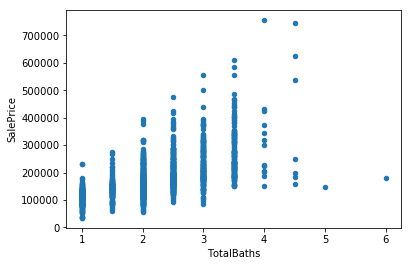

In [497]:
clean_train_data.plot.scatter(x='TotalBaths',y='SalePrice')

In [498]:
clean_train_data.plot.scatter(x='Age',y='SalePrice')

KeyError: 'Age'

In [ ]:
#train_df_num_col = clean_train_data._get_numeric_data().columns
#train_df_num_col = list(train_df_num_col)
#numeric_tain_set = train_df[train_df_num_col]
#numeric_tain_set.head()

In [ ]:
numeric_tain_set.info()

In [ ]:
corr_matrix = clean_train_data.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

In [ ]:

clean_train_data['SalePrice'].hist()

In [ ]:
#corr of all the bath

#corr_matrix.style.background_gradient(cmap='coolwarm')


I really cant explain why the overallcond vs saleprice seems to be flat.
but a -ve corr (-0.077856) was estimated

In [ ]:
#strange that the overall condition has -ve corr with salesprice

